# ML Fundamentals Recap

In [7]:
import pandas as pd

data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preparation

## Class balance

In [8]:
# target balance
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Select features

In [9]:
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
y = data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Missing values

In [11]:
# Check missing data count per column
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# Check missing data ratio per column
X.isna().sum()/len(X)

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

### Dealing with Age

<AxesSubplot:>

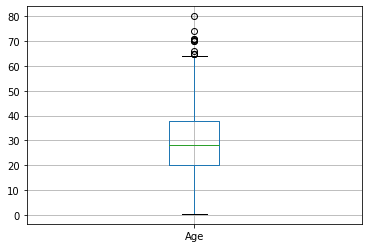

In [13]:
import matplotlib.pyplot as plt

# Check distribution for outliers
X[['Age']].boxplot()

In [14]:
## Since there is less than 30% missing data and no major outliers, impute using KNNimputer

from sklearn.impute import KNNImputer

imputer = KNNImputer()

imputer.fit(X[['Age']])

X['Age'] = imputer.transform(X[['Age']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/1151593508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.transform(X[['Age']])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Dealing with Embarked

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

imputer.fit(X[['Embarked']])

X[['Embarked']] = imputer.transform(X[['Embarked']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/689885018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Embarked']] = imputer.transform(X[['Embarked']])
/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Scaling

### Scaling Age

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

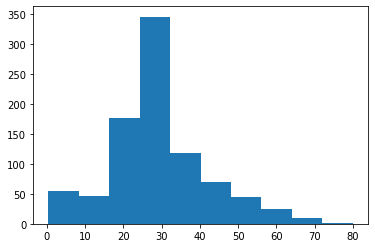

In [16]:
# Check distribution
plt.hist(X[['Age']])

In [17]:
# Since distribution is somehwat normal, and no outliers, Standardscale
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

std_scaler.fit(X[['Age']])

X['Age'] = std_scaler.transform(X[['Age']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/3644287437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = std_scaler.transform(X[['Age']])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.592481,1,0,7.2500,S
1,1,female,0.638789,1,0,71.2833,C
2,3,female,-0.284663,0,0,7.9250,S
3,1,female,0.407926,1,0,53.1000,S
4,3,male,0.407926,0,0,8.0500,S


### Fare

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

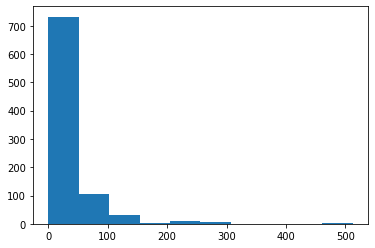

In [18]:
# Check distribution
plt.hist(X[['Fare']], bins = 10)

In [19]:
# Since distribution is not normal and outliers, MinMaxScale
from sklearn.preprocessing import MinMaxScaler

minmaxer = MinMaxScaler()

minmaxer.fit(X[['Fare']])

X[['Fare']] = minmaxer.transform(X[['Fare']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/1376098678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Fare']] = minmaxer.transform(X[['Fare']])
/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.592481,1,0,0.014151,S
1,1,female,0.638789,1,0,0.139136,C
2,3,female,-0.284663,0,0,0.015469,S
3,1,female,0.407926,1,0,0.103644,S
4,3,male,0.407926,0,0,0.015713,S


### SibSb, Parch, Pclass

In [20]:
# Check unique values
X.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [21]:
# Check unique values
X.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [22]:
# Check unique values
X.Pclass.unique()

array([3, 1, 2])

In [23]:
# Since SibSb, Pclass, Parch are ordinal, we want to preserve the relative distance between each.
# While Standardscaler would distort the distances, MinMaxScale preserves it.
# Go for MinMaxScale

minmaxer2 = MinMaxScaler()

minmaxer2.fit(X[['SibSp','Parch','Pclass']])

X[['SibSp','Parch','Pclass']] = minmaxer2.transform(X[['SibSp','Parch','Pclass']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/1208258167.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['SibSp','Parch','Pclass']] = minmaxer2.transform(X[['SibSp','Parch','Pclass']])
/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,-0.592481,0.125,0.0,0.014151,S
1,0.0,female,0.638789,0.125,0.0,0.139136,C
2,1.0,female,-0.284663,0.000,0.0,0.015469,S
3,0.0,female,0.407926,0.125,0.0,0.103644,S
4,1.0,male,0.407926,0.000,0.0,0.015713,S


## Encoding

### Embarked

In [24]:
# Check unique
X.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
# Since embarked is categorical and not ordinal, we One hot Encode it to avoid creating a false relation of order
# One hot encoding will create one new column per possible category

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(X[['Embarked']])

# Visualize transformation without assigning it anywhere
ohe.transform(X[['Embarked']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [26]:
# Access the category names in transformer
list(ohe.categories_[0])

['C', 'Q', 'S']

In [27]:
# Put encoded columns back into dataframe with appropriate names
X[list(ohe.categories_[0])] = ohe.transform(X[['Embarked']])
X.head()

/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/2145830770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(ohe.categories_[0])] = ohe.transform(X[['Embarked']])
/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarn

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1.0,male,-0.592481,0.125,0.0,0.014151,S,0.0,0.0,1.0
1,0.0,female,0.638789,0.125,0.0,0.139136,C,1.0,0.0,0.0
2,1.0,female,-0.284663,0.000,0.0,0.015469,S,0.0,0.0,1.0
3,0.0,female,0.407926,0.125,0.0,0.103644,S,0.0,0.0,1.0
4,1.0,male,0.407926,0.000,0.0,0.015713,S,0.0,0.0,1.0


In [28]:
# Get rid of original embarked column which is not needed anymore
X.drop(columns=['Embarked'], inplace = True)
X.head()

/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,male,-0.592481,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,female,0.638789,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,female,-0.284663,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.0,female,0.407926,0.125,0.0,0.103644,0.0,0.0,1.0
4,1.0,male,0.407926,0.000,0.0,0.015713,0.0,0.0,1.0


### Sex

In [29]:
# Since sex is binary, we can encode is as 0,1.
# As long as its only a binary feature, there will be no assumption of order. Assumption of order starts at 3 categories.
# Use Onehotencoder with parameter drop="if_binary" to encore sex as [0,1]


sex_encoder = OneHotEncoder(drop="if_binary",sparse=False)

sex_encoder.fit(X[['Sex']])

X['Sex'] = sex_encoder.transform(X[['Sex']])

X.head()

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_33120/1015864894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = sex_encoder.transform(X[['Sex']])


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,1.0,-0.592481,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.638789,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,0.0,-0.284663,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.0,0.0,0.407926,0.125,0.0,0.103644,0.0,0.0,1.0
4,1.0,1.0,0.407926,0.000,0.0,0.015713,0.0,0.0,1.0


# Modelling

## Holdout

In [30]:
from sklearn.model_selection import train_test_split

## Holdout method. The test set is not touched until the very end of modelling!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Baseline Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Let's do a simple LogisticRegression as baseline.
# Setting Parameter class_weight as 'balanced' will take into account the class imbalance and adjust the model accordingly
# Return the 4 classification metrics: accuracy, recall, precision, f1

model = LogisticRegression(class_weight= 'balanced')

cross_V_results = cross_validate(model, X_train, y_train, cv = 10, scoring = ["accuracy","recall","precision","f1"])

print(f"The accuracy is :{cross_V_results['test_accuracy'].mean()}")

print(f"The recall is :{cross_V_results['test_recall'].mean()}")

print(f"The precision is :{cross_V_results['test_precision'].mean()}")

print(f"The f1 is :{cross_V_results['test_f1'].mean()}")

The accuracy is :0.7600847457627118
The recall is :0.7213438735177865
The precision is :0.664514874181291
The f1 is :0.6897760965066275


Accuracy: percentage of correct predictions (for both classes)

Recall: percentage of class 1 instances predicted as class 1

Precision: percentage of correct class 1 predictions

F1: harmonic mean between recall and precision

### Let's check the learning curves

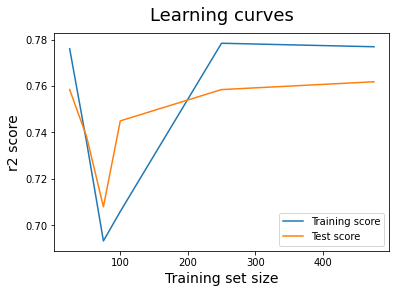

In [33]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250, 476]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(class_weight= 'balanced'), 
    X=X_train, 
    y=y_train, 
    train_sizes=train_sizes, 
    cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

Interpreting the curves:
- It's all a little unstable but that can happen with small training sizes, don't panick! 
- The lines converge, which means the model is generalizing well!
- If you look at the test score, you can see that it stabilizes around 250 training points
    - This means that you could save yourself computational time by training the model on only 250 points while maintaining the performance

## KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

## Let's see if a default KNN would work better
neigh = KNeighborsClassifier()

cross_V_results = cross_validate(neigh, X_train, y_train, cv = 10, scoring = ["accuracy","recall","precision","f1"])

print(f"The accuracy is :{cross_V_results['test_accuracy'].mean()}")

print(f"The recall is :{cross_V_results['test_recall'].mean()}")

print(f"The precision is :{cross_V_results['test_precision'].mean()}")

print(f"The f1 is :{cross_V_results['test_f1'].mean()}")

The accuracy is :0.7953672316384182
The recall is :0.6448616600790514
The precision is :0.7704043196225857
The f1 is :0.6989483194506747


Let's say we want our model to have the highest possible accuracy. The KNN outperforms the Logistic Regression. Let's tune it to try gain performance.

### Tuning K

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = KNeighborsClassifier()

search_space = {'n_neighbors': randint(1, 50), # Random integers between 1 and 50 
                'p': [1, 2], # Either 1 or 2
                'weights':['uniform', 'distance']} # Either uniform or distance


search = RandomizedSearchCV(model, param_distributions=search_space,
                            n_jobs=-1,  cv=5, n_iter=50,scoring = 'accuracy')

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

0.8121288515406162
{'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}


The tuned KNN works a little bit better!!

### Let's check the learning curves

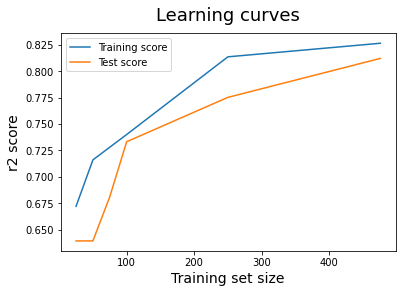

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250, 476]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=12, p=2), 
    X=X_train, 
    y=y_train, 
    train_sizes=train_sizes, 
    cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

Interpreting the curves:
- The lines converge, which means the model is generalizing well!
- If you look at the test score, you can see that it keeps increasing as you add more data.
    - One could wonder what would happen if we had more data for training... would the performance keep increasing?

Since the final model scores almost as well on the test set, we can go ahead and pipeline the process.

# Pipelining

In [164]:
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [174]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Age Preprocessing pipe. First impute, then scale
Age_preprocessor = Pipeline([
    ('imputer', KNNImputer()),
    ('scaling', StandardScaler())
])
    
# Embarked preprocessing pipe. First impute, then encode
Embarked_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(sparse=False))
])    

# Combining Age + Embarked + preprocessing the remaining features (scaling Pclass,SibsSp,Parch & encoding Sex)
full_preprocessor = ColumnTransformer([
    ('age', Age_preprocessor, ['Age']),
    ('embarked', Embarked_preprocessor, ['Embarked']),
    ('minmaxscaler',MinMaxScaler(), ['Pclass','SibSp','Parch']),
    ('sex', OneHotEncoder(drop="if_binary",sparse=False), ['Sex'])
])


In [175]:
# Final pipe
final_pipe = Pipeline([
    ('preprocessing', full_preprocessor), # Full preprocessor
    ('model', RandomForestClassifier(max_depth=8))]) # Optimal model

In [179]:
final_pipe.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Embarked']),
                                

### Pickle the fitted pipeline

In [ ]:
import pickle

# Export pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(final_pipe, file)
